In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_19804\2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,31.768667,34.579216,26.258098,28.358115,855215656
2007-10-08,30.142332,32.842352,29.952856,32.842352,126671715
2007-10-09,32.194988,32.479200,28.531802,30.158129,116725709
2007-10-10,32.494984,33.158147,32.210772,33.031829,67931378
2007-10-11,36.126595,37.895030,32.210777,37.895030,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,78.234865,79.251475,77.230398,78.271021,1.188963e+07
std,63.502198,64.244905,62.711074,63.483855,2.061999e+07
min,18.548227,19.827415,16.629446,19.731476,0.000000e+00
25%,35.657295,36.219834,35.130681,35.693811,4.799653e+06
50%,54.180208,54.805795,53.455125,54.284228,8.344398e+06
75%,81.129337,82.097712,80.167311,81.151395,1.362032e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,31.768667221069336,34.57921595595695,26.258097754841593,28.358114831039718,855215656
2,1,2007-10-08,30.142332077026367,32.842352093381905,29.952856161576868,32.842352093381905,126671715
3,2,2007-10-09,32.19498825073242,32.4792000679655,28.53180181972493,30.1581290413598,116725709
4,3,2007-10-10,32.4949836730957,33.15814730449772,32.21077191198066,33.03182930053533,67931378


In [13]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
# Reset index in case 'Date' is in index
if 'Date' not in df.columns:
    df = df.reset_index()

# Drop only if columns exist
df = df.drop(columns=[col for col in ['Date', 'Adj Close'] if col in df.columns])

C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_19804\713444659.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,31.768667,34.579216,26.258098,28.358115,855215656
1,30.142332,32.842352,29.952856,32.842352,126671715
2,32.194988,32.479200,28.531802,30.158129,116725709
3,32.494984,33.158147,32.210772,33.031829,67931378
4,36.126595,37.895030,32.210777,37.895030,106320954


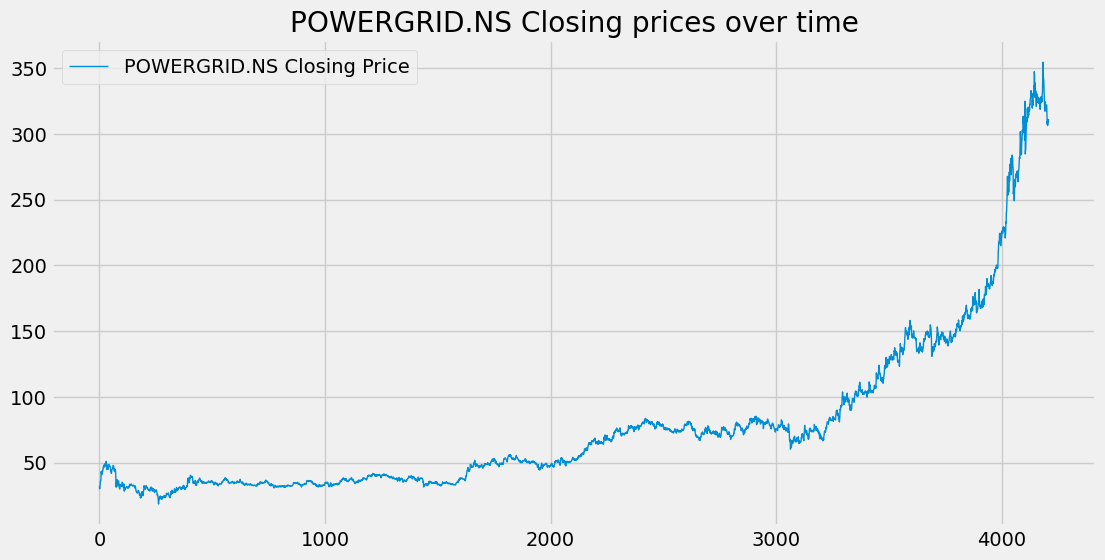

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

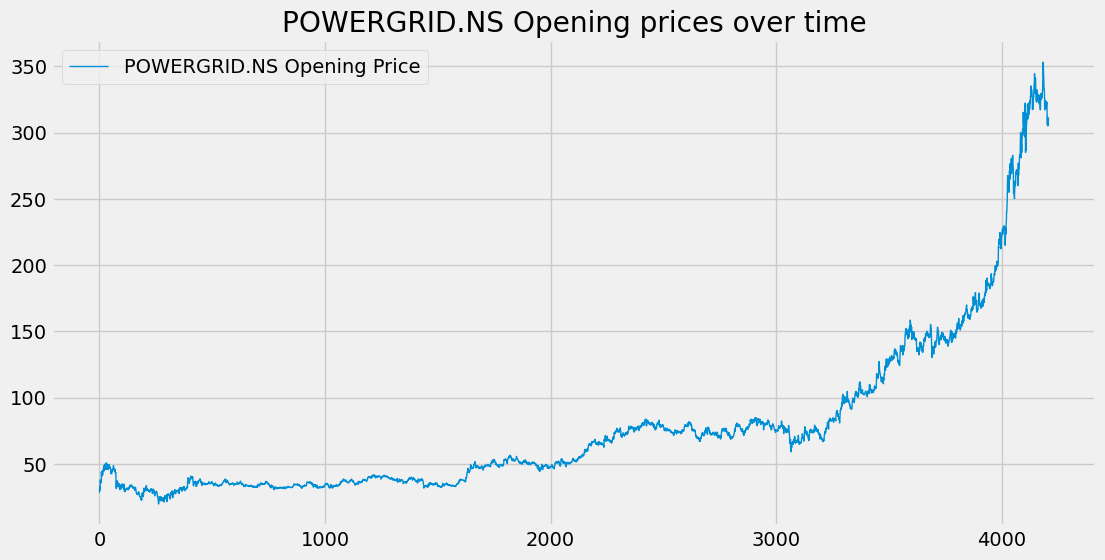

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

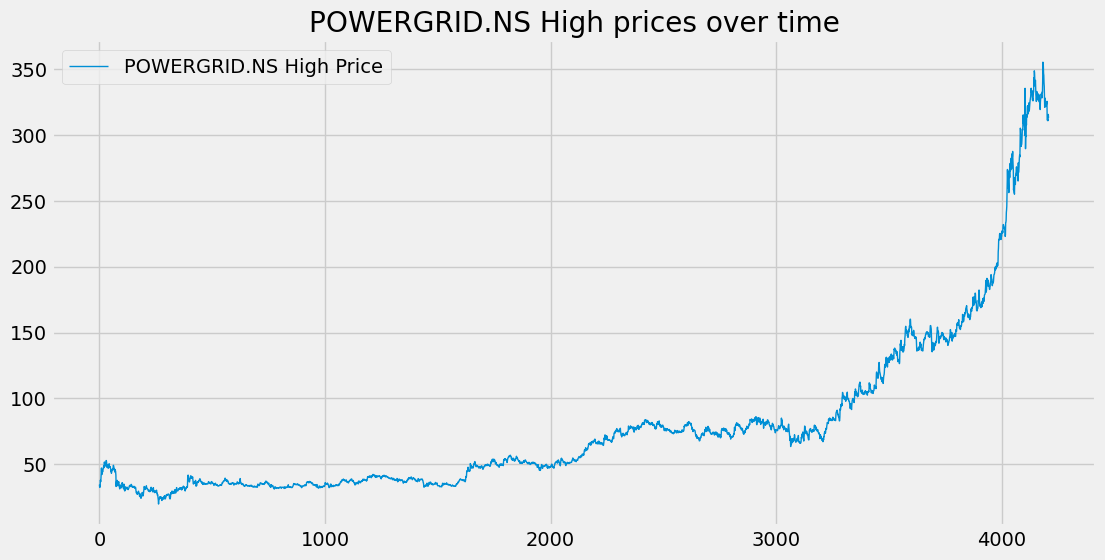

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

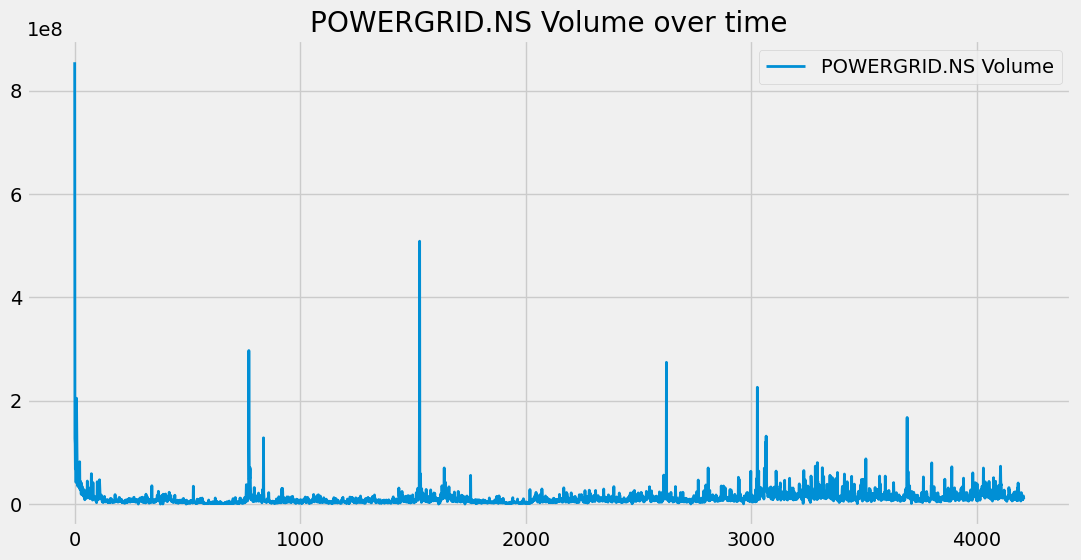

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [21]:
import pandas as pd
df01 = pd.DataFrame(temp_data)
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [22]:
ma100 = df.Close.rolling(100).mean()

In [23]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,323.594424
4204,323.834954
4205,324.069892
4206,324.268576


In [24]:
ma200 = df.Close.rolling(200).mean()

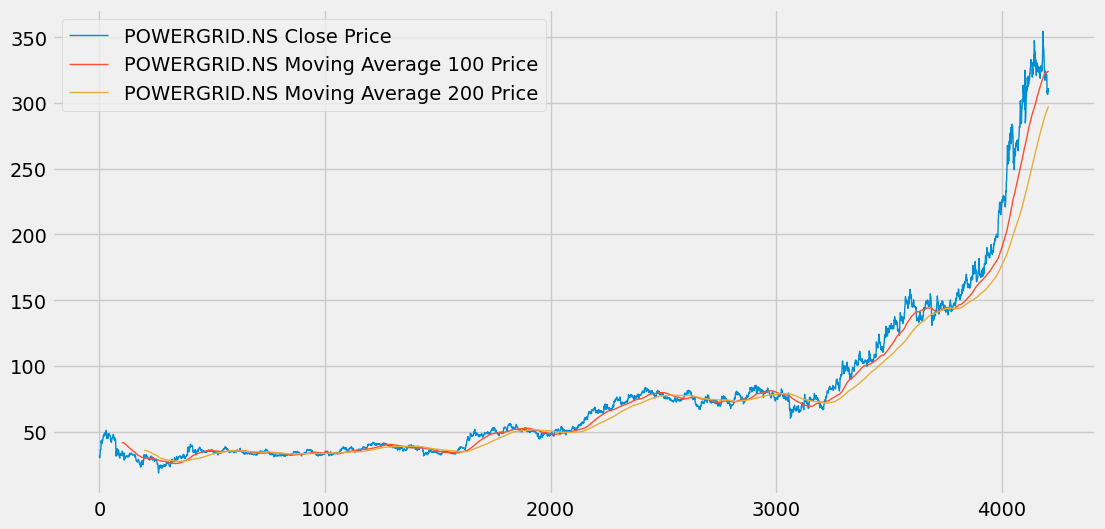

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [26]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [27]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

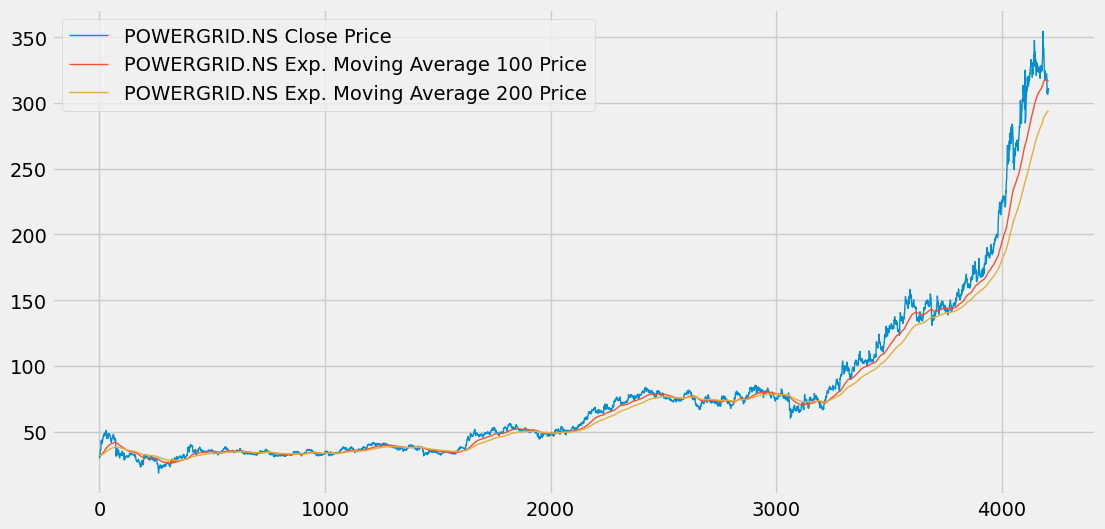

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [29]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [30]:
data_training.shape

(2945, 1)

In [31]:
data_testing.shape

(1263, 1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [33]:
data_training_array = scaler.fit_transform(data_training)

In [34]:
data_training_array

array([[0.19808597],
       [0.17371809],
       [0.20447367],
       ...,
       [0.90774413],
       [0.86000357],
       [0.87299634]], shape=(2945, 1))

In [35]:
data_training_array.shape[0]

2945

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [37]:
x_train.shape

(2845, 100, 1)

In [38]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

model = Sequential()

# Input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# LSTM + Dropout layers
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - loss: 0.0298
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0080
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0064
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0064
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 0.0072
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0053
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0057
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.0052
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 0.0050
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0047
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.0041
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0041
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0039
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0038
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [43]:
past_100_days = data_training.tail(100)

In [45]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
final_df.head()

Ticker,POWERGRID.NS
0,74.289230
1,75.803719
2,76.062759
3,75.903351
4,76.341759


In [47]:
input_data = scaler.fit_transform(final_df)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [49]:
x_test.shape

(1263, 100, 1)

In [50]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step  


In [51]:
y_predicted.shape

(1263, 1)

In [52]:
scaler.scale_

array([0.00339787])

In [53]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

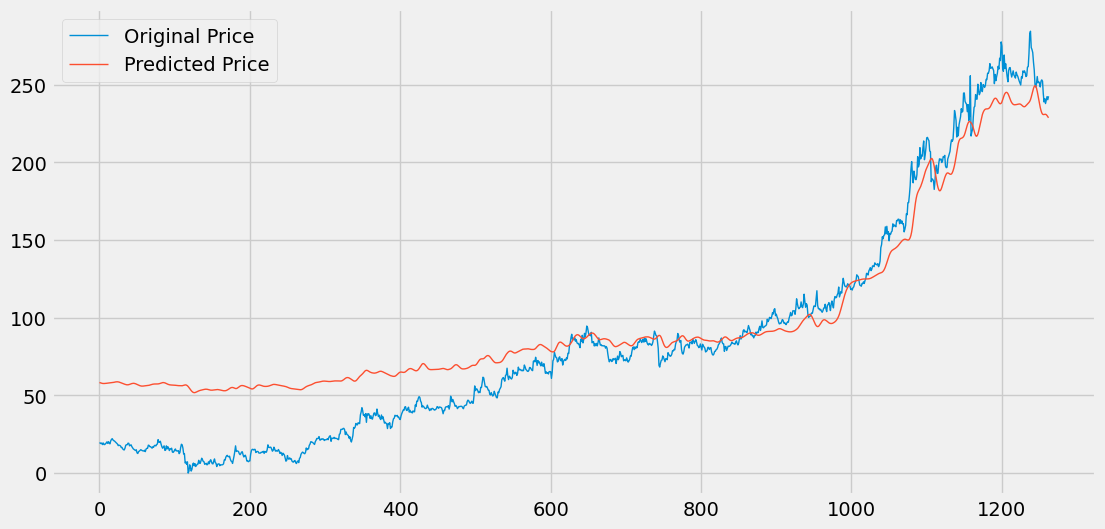

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [55]:
model.save('stock_dl_model.h5')